# 6.2 Exploring relationships

### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Check Data
#### 3. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots
#### 4. Answered Questions
#### 5. Hypotheses 

### 1. Importing Visualization Libraries and Data

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Create a path

path = "/Users/auralynnrosario/Documents/11-2025 Gun Violence Analysis"

In [3]:
# Import Dataframe

df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','gun_violence_checked.csv'))

### 2. Check Data

In [4]:
df.shape

(239677, 24)

In [5]:
df.columns

Index(['Unnamed: 0', 'incident_id', 'date', 'state', 'city_or_county',
       'n_killed', 'n_injured', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude', 'longitude',
       'n_guns_involved', 'participant_age_group', 'participant_gender',
       'participant_status', 'participant_type', 'state_house_district',
       'state_senate_district', 'guns_count_known', 'congressional_known',
       'state_house_known', 'state_senate_known'],
      dtype='object')

In [6]:
df.head()

,Unnamed: 0,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,gun_stolen,gun_type,...,participant_age_group,participant_gender,participant_status,participant_type,state_house_district,state_senate_district,guns_count_known,congressional_known,state_house_known,state_senate_known
0,0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,14.0,Unknown,Unknown,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,NaN,NaN,0,1,0,0
1,1,460726,2013-01-01,California,Hawthorne,1,3,43.0,Unknown,Unknown,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,62.0,35.0,0,1,1,1
2,2,478855,2013-01-01,Ohio,Lorain,1,3,9.0,0::Unknown||1::Unknown,0::Unknown||1::Unknown,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56.0,13.0,1,1,1,1
3,3,478925,2013-01-05,Colorado,Aurora,4,0,6.0,Unknown,Unknown,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,40.0,28.0,0,1,1,1
4,4,478959,2013-01-07,North Carolina,Greensboro,2,2,6.0,0::Unknown||1::Unknown,0::Handgun||1::Handgun,...,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62.0,27.0,1,1,1,1


### 3. Explore Relationships

In [7]:
num_cols = [
    "n_killed",
    "n_injured",
    "n_guns_involved",
    "latitude",
    "longitude"
]

# Ensure they are numeric 
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors="coerce")

df[num_cols].dtypes

n_killed             int64
n_injured            int64
n_guns_involved    float64
latitude           float64
longitude          float64
dtype: object

In [8]:
# Create correlation matrix

corr = df[num_cols].corr()
print(corr)

                 n_killed  n_injured  n_guns_involved  latitude  longitude
n_killed         1.000000  -0.125425        -0.028200 -0.080078  -0.062149
n_injured       -0.125425   1.000000        -0.038843 -0.011379   0.036962
n_guns_involved -0.028200  -0.038843         1.000000 -0.001341  -0.016107
latitude        -0.080078  -0.011379        -0.001341  1.000000  -0.056713
longitude       -0.062149   0.036962        -0.016107 -0.056713   1.000000


### Heatmaps

#### Create a correlation heatmap using matplotlib

<Figure size 500x500 with 0 Axes>

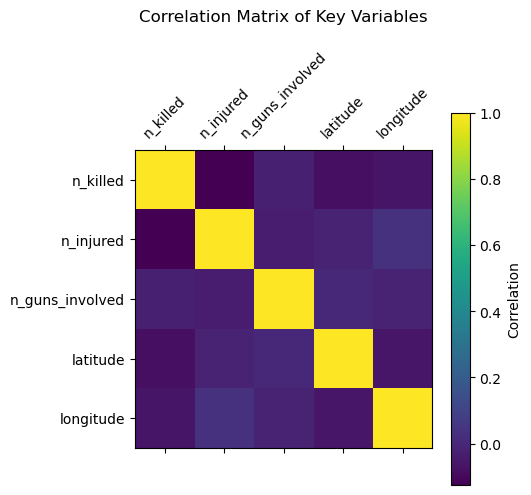

In [9]:
# 1. Pick numeric columns you want
num_cols = ["n_killed", "n_injured", "n_guns_involved", "latitude", "longitude"]

# 2. Make sure they’re numeric
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors="coerce")

# 3. Correlation matrix
corr = df[num_cols].corr()

# 4. Plot with matshow on the underlying array
plt.figure(figsize=(5, 5))
plt.matshow(corr.values)   # <-- use .values here
plt.xticks(range(len(num_cols)), num_cols, rotation=45)
plt.yticks(range(len(num_cols)), num_cols)
plt.colorbar(label="Correlation")
plt.title("Correlation Matrix of Key Variables", pad=20)
plt.show()



#### Create a correlation heatmap using seaborn

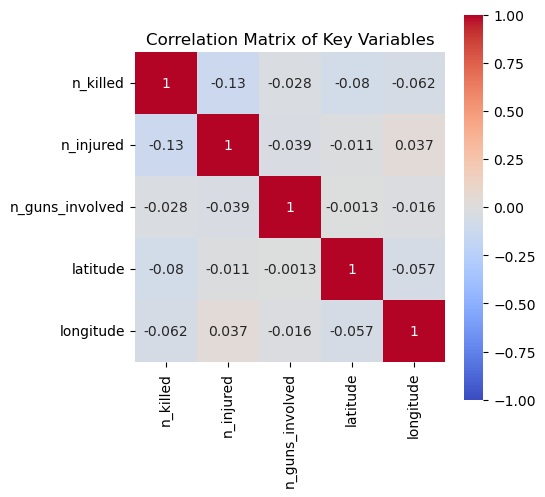

In [10]:
num_cols = ["n_killed", "n_injured", "n_guns_involved", "latitude", "longitude"]
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors="coerce")

corr = df[num_cols].corr()

plt.figure(figsize=(5, 5))
sns.heatmap(
    corr,
    annot=True,        # show the numbers
    cmap="coolwarm",
    vmin=-1, vmax=1,
    square=True
)
plt.title("Correlation Matrix of Key Variables")
plt.show()


I created a correlation matrix heatmap using five numeric variables: number killed (`n_killed`), number injured (`n_injured`), number of guns involved (`n_guns_involved`), and the latitude and longitude of each incident. The correlation values are all quite small (mostly between -0.13 and 0.04), which means **there are no strong linear relationships between these variables**.

The strongest correlation is a **very weak negative relationship** between `n_killed` and `n_injured` (about **-0.13**). This suggests that incidents with more fatalities tend to have **slightly fewer injuries**, and incidents with more injuries tend to have **slightly fewer deaths**, but **the effect is small**.

The correlations between the number of victims (`n_killed` and `n_injured`) and the number of guns involved (`n_guns_involved`) are **close to zero**, so **the number of guns recorded in an incident does not strongly predict how many people are killed or injured**.

Latitude and longitude also show only **very weak correlations** with the other variables, indicating that **simple linear relationships between location and severity are limited** in this dataset.

Overall, the heatmap shows that **these variables do not move together in a strong linear way**. The correlation coefficients **describe how the variables change together, but they do not imply cause and effect**.

It is important to note that the variable `n_guns_involved` has a high level of missing data (about **41.5%** of incidents have no recorded value). This means that any correlations involving `n_guns_involved` are based only on the subset of incidents where this information is known. As a result, these coefficients should be interpreted with caution, because they may not fully represent all incidents.

### Scatterplot

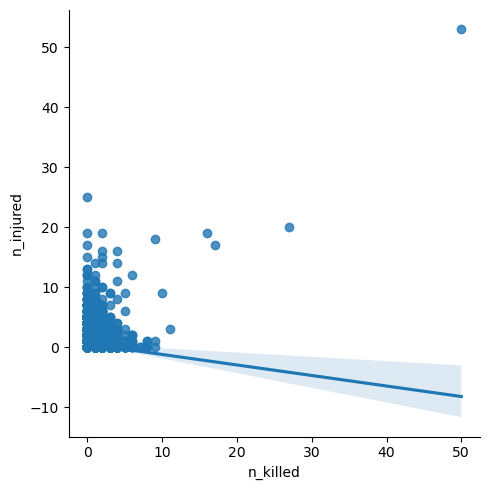

In [11]:
# Create a scatterplot for "n_killed" and "n_injured" in seaborn

sns.lmplot(x='n_killed', y='n_injured', data=df)

The scatterplot shows the relationship between the number of people killed (`n_killed`) and the number of people injured (`n_injured`) for each incident. Most points are tightly clustered near the origin, which means **the vast majority of incidents involve very few deaths and very few injuries**.

There is a **single extreme outlier** around 50 killed and 50+ injured. This mass-casualty event has a strong influence on the regression line drawn by seaborn. Because of this point, the fitted line slopes slightly **downward**, even though the overall pattern of points does **not** show a clear linear trend.

This visual pattern is consistent with the correlation coefficient of about **-0.13**, which indicates a **very weak negative relationship** between deaths and injuries. In practical terms, **incidents with more fatalities sometimes have fewer injuries and vice versa, but the relationship is weak and heavily affected by a few extreme cases**. The scatterplot suggests that **simple linear models are not a good way to describe the relationship between `n_killed` and `n_injured` in this dataset**.

### Pair Plot

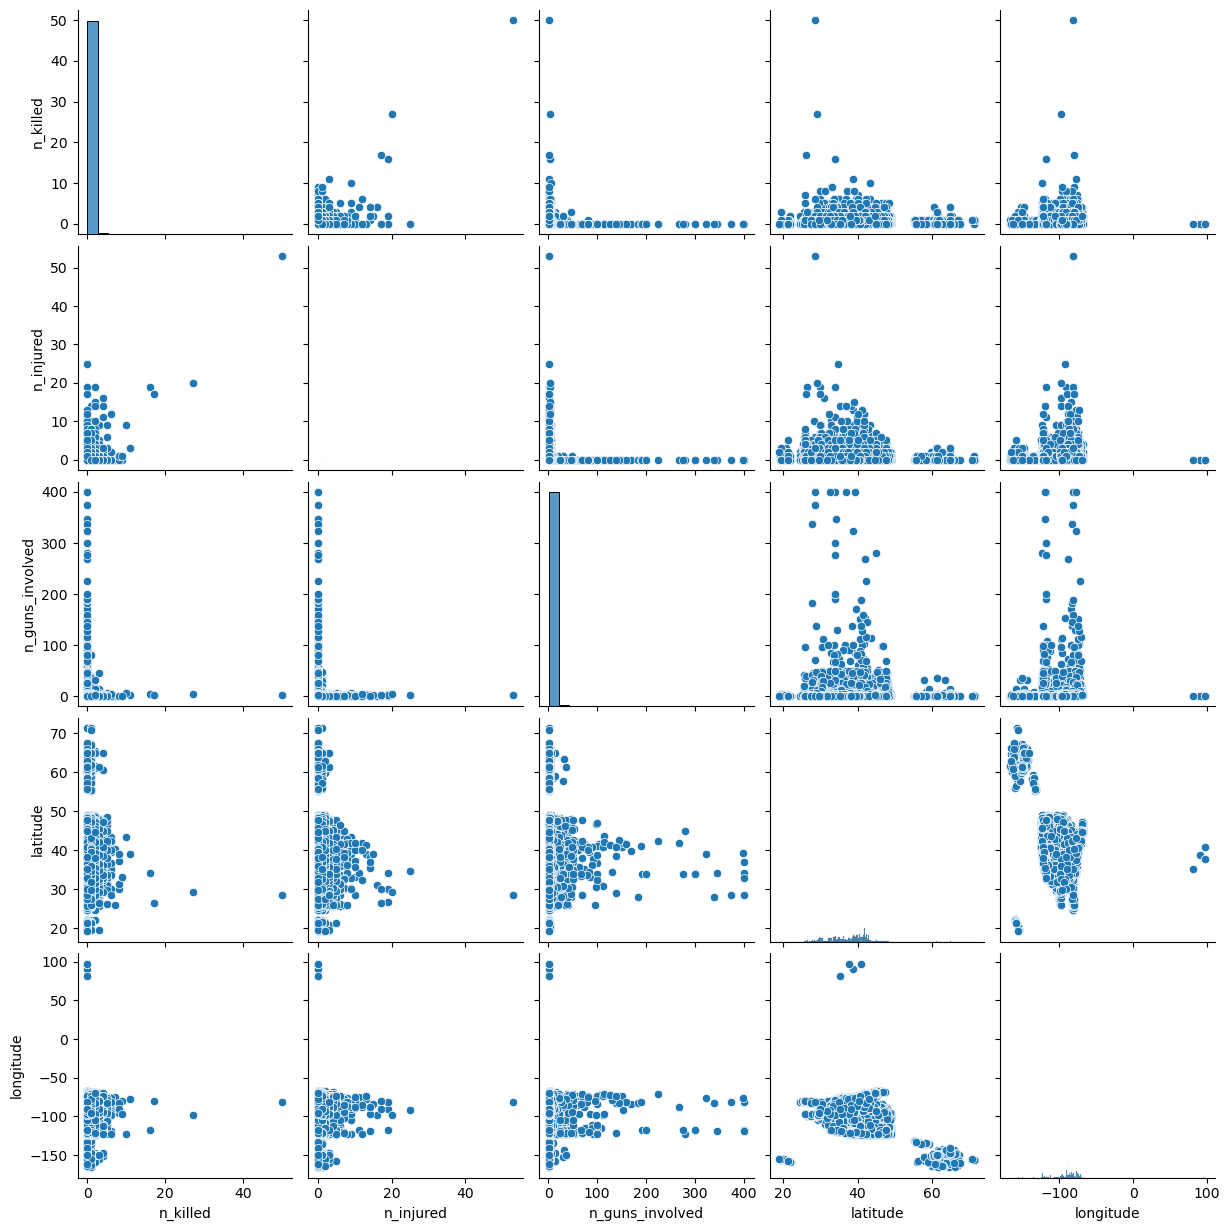

In [12]:
# Create a pair plot

sns.pairplot(df[num_cols].dropna())

The pair plot shows the relationships between five numeric variables: `n_killed`, `n_injured`, `n_guns_involved`, `latitude`, and `longitude`.

On the diagonal, the histograms for **`n_killed`**, **`n_injured`**, and **`n_guns_involved`** are all **heavily right-skewed**. Most incidents cluster at very low values (often zero), with a **long tail of rare, more severe events**. For `n_guns_involved`, the plot highlights a few extreme values (including incidents with hundreds of guns), which are likely gun buyback or seizure events rather than typical shootings. In contrast, **`latitude`** and **`longitude`** are spread across ranges that reflect the **geographic distribution of incidents across the U.S.**, not a standard bell-shaped distribution.

The off-diagonal scatterplots mostly show **dense clouds near zero** for the outcome variables, with no clear linear patterns. This matches the earlier correlation results: **simple linear relationships between these variables are weak**. Scatterplots involving `latitude` and `longitude` reveal that incidents tend to cluster in particular geographic bands (certain latitudes and longitudes), suggesting regional concentration rather than a smooth gradient.

Based on this pair plot, I would like to explore the following variables further:

- **`n_killed` and `n_injured`**: These define incident severity. I want to examine how deaths and injuries vary **by state, over time, and by incident characteristics** (for example, domestic violence, mass shooting, non-shooting events).
- **`n_guns_involved`**: The strong skew and extreme outliers suggest different kinds of events (typical shootings vs. large gun buybacks or seizures). I want to **separate and compare these incident types** and see how the number of guns relates to outcomes.
- **`latitude` and `longitude`**: The visible clusters suggest geographic hotspots. I plan to use these variables in **maps or spatial analyses** to identify areas with especially high concentrations of gun violence.

Overall, the pair plot confirms that **most incidents are low-severity but there are a few extreme events**, and that **location and severity are better explored with grouped or spatial analyses rather than simple linear relationships.**


### Categorical Plot

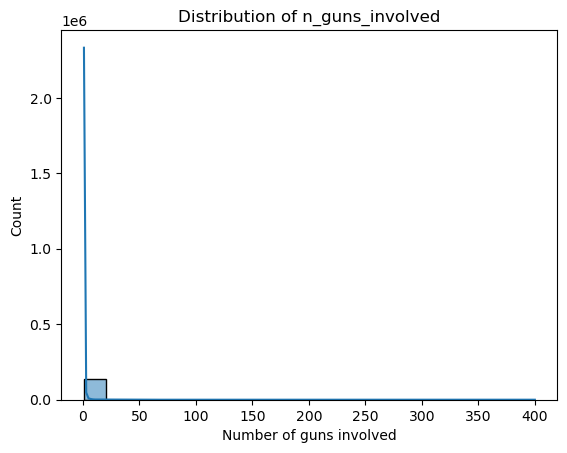

In [13]:
# Only use rows where the number of guns is known
df_guns = df[df["n_guns_involved"].notna()].copy()

# Histogram to see the distribution
sns.histplot(df_guns["n_guns_involved"], bins=20, kde=True)
plt.xlabel("Number of guns involved")
plt.title("Distribution of n_guns_involved")
plt.show()

In [14]:
# Create gun count categories
df_guns.loc[df_guns["n_guns_involved"] == 1, "Guns category"] = "1 gun"
df_guns.loc[(df_guns["n_guns_involved"] == 2), "Guns category"] = "2 guns"
df_guns.loc[(df_guns["n_guns_involved"] >= 3) & 
            (df_guns["n_guns_involved"] <= 4), "Guns category"] = "3–4 guns"
df_guns.loc[df_guns["n_guns_involved"] >= 5, "Guns category"] = "5+ guns"

# Check how many incidents fall into each category
df_guns["Guns category"].value_counts(dropna=False)

Guns category
1 gun       127548
2 guns        7477
3–4 guns      2892
5+ guns       2309
Name: count, dtype: int64

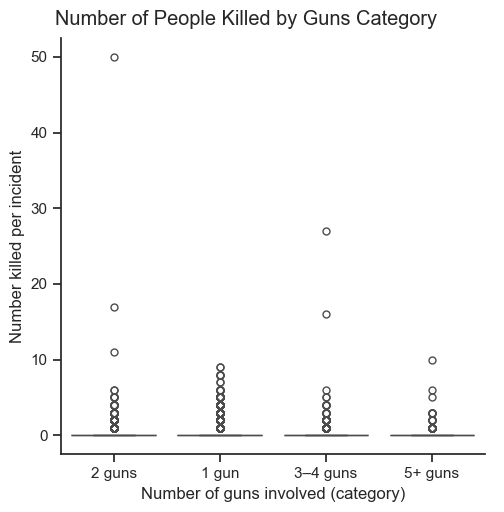

In [15]:
# Create a categorical plot in seaborn

sns.set(style="ticks")

g = sns.catplot(
    x="Guns category",
    y="n_killed",
    kind="box",          # boxplot for each category
    data=df_guns
)

g.set_axis_labels("Number of guns involved (category)", "Number killed per incident")
g.fig.suptitle("Number of People Killed by Guns Category", y=1.02)
plt.show()


The categorical plot shows the distribution of the number of people killed (`n_killed`) for four categories of `n_guns_involved`: **"1 gun"**, **"2 guns"**, **"3–4 guns"**, and **"5+ guns"**. Each box summarizes the incidents in that category (median, spread, and outliers).

Across all categories, the median number of people killed is **very low (often 0)**, which means that most incidents, regardless of how many guns are involved, result in no deaths. The boxes are short and close to zero, with a few individual points far above the boxes, representing **rare, high-fatality incidents**.

The category **"1 gun"** has by far the most incidents, confirming that **most recorded incidents with known gun information involve a single firearm**. The higher categories (**"3–4 guns"** and **"5+ guns"**) have many fewer incidents, and their distributions are dominated by a small number of outliers. Some of these extreme values likely correspond to special events such as gun buybacks or large seizures rather than typical shootings.

Overall, this plot suggests that **most incidents are low-fatality events, even when multiple guns are present**, and that **the number of guns involved does not cleanly separate low- and high-fatality incidents**. Because about **41.5% of incidents are missing `n_guns_involved`**, these results apply only to the subset of incidents where the gun count is recorded.


### 4. Answered Questions

### Revisited questions and early answers

**1. Which states and cities have the highest numbers of gun violence incidents, injuries, and deaths between 2013 and 2018?**  
So far, my exploration has focused on overall patterns, not yet on state or city groupings. The pair plots with latitude and longitude show that incidents are spread across the U.S. with clear regional clusters, but I have **not yet summarized incidents, injuries, or deaths by state or city**. This will require grouping the data by 'state' and 'city_or_county' in a later step.

**2. How do the characteristics of incidents relate to the number of people killed, injured, and guns involved?**  
Early exploration of `n_killed`, `n_injured`, and `n_guns_involved` shows that:

- **Most incidents are low-severity**: the median numbers of people killed and injured are both 0, and most incidents with known gun data involve **only one gun**.  
- There are **rare but extreme incidents** with many victims or many guns. Some of the highest gun counts (for example, 400 guns) are labeled as `"Non-Shooting Incident || Gun buy back action"`, which are buyback events or seizures rather than typical shootings.  
- Correlations between `n_killed`, `n_injured`, and `n_guns_involved` are **very weak**, so the number of guns in an incident does **not strongly predict** how many people are killed or injured.

This suggests that incident characteristics (such as being a shooting vs. a gun buyback) are crucial for understanding severity, and that I will need to **separate shooting incidents from non-shooting events** in later analysis.

**3. How do latitude and longitude relate to incident severity?**  
The pair plot shows that:

- `latitude` and `longitude` values are spread across wide ranges, reflecting the geographic spread of incidents in the U.S.  
- Scatterplots of severity (`n_killed`, `n_injured`) against latitude and longitude show **clusters of points in certain regions**, but no strong linear pattern.  
- The correlation matrix confirms that the relationships between location and severity are **very weak**.

This means that simple linear relationships between where an incident happens and how severe it is are limited, and that I should use **maps and grouped summaries** (for example, by state or city) rather than plain correlations to explore geography.

### New questions that came up from the visual exploration

Based on the correlation matrix, scatterplot, pair plot, and categorical plot, I now have some new questions:

- **How do results change if I exclude non-shooting incidents such as gun buybacks and large gun seizures?**  
  These events have many guns but no victims and may distort summaries of `n_guns_involved`.

- **Among shooting incidents only, are high-fatality events more likely to involve multiple guns or particular gun types?**  
  This would link `incident_characteristics`, `gun_type`, and `n_guns_involved` to severity.

- **How does severity (numbers killed and injured) vary by state or city when I group the data geographically?**  
  This will directly address my original "which states and cities are most affected" question.

- **Does the distribution of severity look different over time (by year or month)?**  
  This would help show whether severe incidents are becoming more or less common within the 2013 to 2018 period.


### 5. Hypotheses

**Hypothesis 1 – Guns involved and severity**

- **H0 (null):** Among shooting incidents, incidents with more than one gun do *not* have a higher average number of people killed or injured than incidents with only one gun.  
- **H1 (alternative):** Among shooting incidents, incidents with more than one gun *do* have a higher average number of people killed or injured than incidents with only one gun.

*(This connects `n_guns_involved` with `n_killed` and `n_injured`. I would exclude clear non-shooting events such as gun buybacks.)*

**Hypothesis 2 – Differences between states**

- **H0 (null):** The average number of people killed and injured per incident is the same across all states.  
- **H1 (alternative):** At least one state has a different average number of people killed or injured per incident compared to other states.

*(This uses `state`, `n_killed`, and `n_injured` and relates to which states are more affected.)*

**Hypothesis 3 – Shooting vs. non-shooting incidents**

- **H0 (null):** Shooting incidents and non-shooting incidents (for example, gun seizures or buybacks) have the same average number of people killed and injured.  
- **H1 (alternative):** Shooting incidents have a higher average number of people killed and injured than non-shooting incidents.

*(This uses `incident_characteristics`, `n_killed`, and `n_injured`.)*

**Hypothesis 4 – Change over time**

- **H0 (null):** The average number of people killed and injured per incident did not change over the years 2013–2018.  
- **H1 (alternative):** The average number of people killed and injured per incident changed over the years 2013–2018.

*(This uses `date` (or `year`) with `n_killed` and `n_injured` and checks for a time trend.)*
